## Introduction
# Context
Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

# Content
This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.
RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

This column is marked 'Yes' if the rain for that day was 1mm or more.
Source & Acknowledgements
The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
pd.set_option('display.max_columns', None)

In [2]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

import warnings
warnings.filterwarnings('ignore')

In [3]:
import problem

X_df, y = problem.get_train_data()

In [4]:
X_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-09-23,Darwin,26.1,31.8,0.0,5.0,4.7,NE,33.0,ENE,NE,17.0,11.0,68.0,63.0,1012.4,1007.8,7.0,7.0,28.9,29.6,No
1,2014-11-22,MelbourneAirport,9.6,30.7,0.0,6.8,4.6,N,61.0,N,N,17.0,39.0,48.0,21.0,1010.9,1007.6,7.0,7.0,20.1,29.1,No
2,2013-11-30,WaggaWagga,10.7,27.6,0.0,8.6,13.6,ENE,31.0,ENE,NNE,13.0,11.0,46.0,16.0,1017.6,1016.0,1.0,1.0,17.8,25.7,No
3,2015-05-03,PerthAirport,7.2,22.4,0.0,4.0,9.0,SW,69.0,N,WNW,7.0,31.0,57.0,48.0,1014.2,1011.9,3.0,4.0,16.1,20.9,No
4,2010-09-15,Brisbane,17.9,26.1,0.4,4.0,10.7,W,52.0,W,WSW,17.0,15.0,40.0,32.0,1012.7,1011.1,2.0,1.0,21.4,25.7,No


In [5]:
X_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [6]:
label_names = {0: 'No rain', 1: 'Rain'}
labels = list(label_names.keys())
y_series = pd.Series(y).replace(label_names)
y_series.head()

0       Rain
1    No rain
2    No rain
3       Rain
4    No rain
Name: RainTomorrow, dtype: object

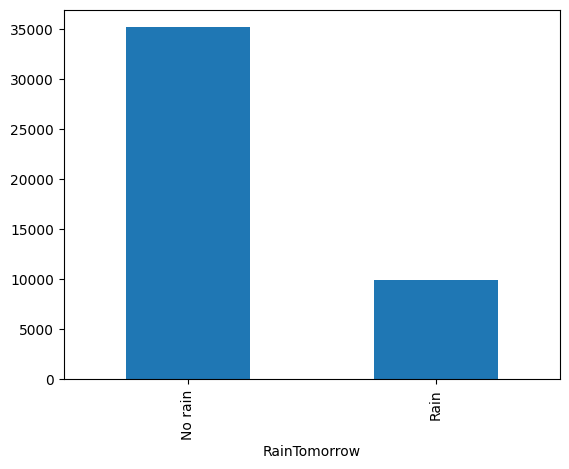

In [7]:
_ = y_series.value_counts().plot(kind="bar")


In [8]:
WINDIR = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Rainfall trace for WindDir9am
fig.add_trace(
    go.Scatter(
        y=X_df.groupby('WindDir9am')['Rainfall'].mean(),
        x=WINDIR,
        name='Wind dir. 9am - Rainfall',
        line=dict(color='royalblue', width=4, dash='solid')
    )
)

# Rainfall trace for WindDir3pm
fig.add_trace(
    go.Scatter(
        y=X_df.groupby('WindDir3pm')['Rainfall'].mean(),
        x=WINDIR,
        name='Wind dir. 3pm - Rainfall',
        line=dict(color='skyblue', width=2, dash='dot')
    )
)

# Evaporation trace for WindDir3pm
fig.add_trace(
    go.Scatter(
        y=X_df.groupby('WindDir3pm')['Evaporation'].mean(),
        x=WINDIR,
        name='Wind dir. 3pm - Evaporation',
        line=dict(color='darkgray', width=4, dash='solid')
    ),
    secondary_y=True,
)

# Evaporation trace for WindDir9am
fig.add_trace(
    go.Scatter(
        y=X_df.groupby('WindDir9am')['Evaporation'].mean(),
        x=WINDIR,
        name='Wind dir. 9am - Evaporation',
        line=dict(color='lightgray', width=2, dash='dot')
    ),
    secondary_y=True,
)

fig.update_layout(
    title={
        'text': '<b>Rainfall & Evaporation vs Wind Direction</b>',
        'font': {'size': 28, 'family': 'Serif'}
    },
    xaxis_title='<b>Wind Direction</b>',
    yaxis_title='<b>Rainfall [mm]</b>',
    template='simple_white',
    showlegend=True,
    paper_bgcolor='#edeeee',
    plot_bgcolor='#edeeee',
    width=950, height=500,
)
fig.update_yaxes(title_text="<b>Evaporation [mm]</b>", secondary_y=True)

fig.show()

In [10]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(
    go.Barpolar(
        r=X_df.groupby('WindDir9am')['Rainfall'].mean(),
        theta=WINDIR,
        name='Wind Dir. 9am'
    )
)

fig.add_trace(
    go.Barpolar(
        r=X_df.groupby('WindDir3pm')['Rainfall'].mean(),
        theta=WINDIR,
        name='Wind Dir. 3pm'
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=False)
    ),
    showlegend=True,
    title={
        'text': 'Rainfall vs Wind Direction',
        'font': {'size': 28, 'family': 'Serif'}
    },
    template='plotly_dark',
    paper_bgcolor='gray',
    width=600, height=500,
)

fig.show()
